# Fraud Detection EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [3]:
from pandas.tools.plotting import scatter_matrix

In [4]:
df_original = pd.read_json('data/train_new.json')

In [6]:
df = df_original.copy()

In [7]:
num_rows, num_cols = df.shape

Not all of the datatypes are correct

In [82]:
df.iloc[:,[0,39,40,41]].to_csv("C:/Users/Anon/Desktop/coordinates.csv",na_rep='None',index=False)

In [84]:
df.dtypes

acct_type              object
approx_payout_date      int64
body_length             int64
channels                int64
country                object
currency               object
delivery_method       float64
description            object
email_domain           object
event_created           int64
event_end               int64
event_published       float64
event_start             int64
fb_published            int64
gts                   float64
has_analytics           int64
has_header            float64
has_logo                int64
listed                 object
name                   object
name_length             int64
num_order               int64
num_payouts             int64
object_id               int64
org_desc               object
org_facebook          float64
org_name               object
org_twitter           float64
payee_name             object
payout_type            object
previous_payouts       object
sale_duration         float64
sale_duration2          int64
show_map  

In [8]:
df.shape

(14337, 44)

In [11]:
df.columns

Index([u'acct_type', u'approx_payout_date', u'body_length', u'channels',
       u'country', u'currency', u'delivery_method', u'description',
       u'email_domain', u'event_created', u'event_end', u'event_published',
       u'event_start', u'fb_published', u'gts', u'has_analytics',
       u'has_header', u'has_logo', u'listed', u'name', u'name_length',
       u'num_order', u'num_payouts', u'object_id', u'org_desc',
       u'org_facebook', u'org_name', u'org_twitter', u'payee_name',
       u'payout_type', u'previous_payouts', u'sale_duration',
       u'sale_duration2', u'show_map', u'ticket_types', u'user_age',
       u'user_created', u'user_type', u'venue_address', u'venue_country',
       u'venue_latitude', u'venue_longitude', u'venue_name', u'venue_state'],
      dtype='object')

Doesn't look to be any duplicates
Not sure why not specifying a subset gave an error

In [30]:
df.drop_duplicates(subset=col_lst[:10],keep='last').shape

(14337, 44)

To display all the columns without the '...'

In [289]:
pd.set_option('display.max_columns',22)

## TBD

In [ ]:
scatter_matrix(df.drop([],axis=1),diagonal='kde',figsize=(6,6))

Deal with outliers, make sure things are on a comparible scale

Investigate the crosstab histogram - I don't think it's doing what you want it to do

## Target variable

In [ ]:
df.iloc[:,0].describe()

In [ ]:
df['acct_type'].unique()

Transforming the target variable: if the target variable contains the string "fraud" then mark it as a 1 else 0 

In [ ]:
df['acct_type'] = df['acct_type'].map(lambda x: 0 if 'fraud' not in x else 1)

There are ~10X more non-fraud event than fraud events, this needs to be taken into account when building a model

df.groupby('acct_type').count().body_length

fraud_num,legit_num = [1293.,13044.]

## EDA on the first 22 columns

In [328]:
df.iloc[1:4,0:22]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order
1,0,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23
2,0,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19
3,0,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39


### Approx_payout_date

In [337]:
pd.to_datetime(df['approx_payout_date'],unit='s').head(10) #you can use .dt.date to just get the date

0   2010-02-13 12:00:00
1   2011-02-03 08:00:00
2   2011-01-28 00:00:00
3   2014-01-06 00:00:00
4   2011-02-17 00:00:00
5   2011-03-19 01:00:00
6   2011-02-17 02:30:00
7   2011-02-03 05:00:00
8   2011-02-20 07:00:00
9   2011-02-10 05:00:00
Name: approx_payout_date, dtype: datetime64[ns]

### Body_Length

In [62]:
df.body_length.describe()

count    14337.000000
mean      3672.521936
std       5758.113003
min          0.000000
25%        750.000000
50%       1990.000000
75%       4280.000000
max      65535.000000
Name: body_length, dtype: float64

In [122]:
df['row_num']=range(num_rows)

In [92]:
df.query('body_length == 0 and acct_type == 1').shape[0]/fraud_num

0.2552204176334107

In [93]:
df.query('body_length == 0 and acct_type == 0').shape[0]/legit_num

0.03825513646120822

testing for independence

Probably don't need to construct this variable - a tree would make the split

In [96]:
df['zero_body_length'] = df.body_length.apply(lambda x: 1 if x == 0 else 0)

In [97]:
pd.crosstab(df.acct_type,df.zero_body_length,margins=True)

zero_body_length,0,1,All
acct_type,,,
0,12545,499,13044
1,963,330,1293
All,13508,829,14337


In [98]:
observed = pd.crosstab(df.acct_type,df.zero_body_length)

In [99]:
observed

zero_body_length,0,1
acct_type,,
0,12545,499
1,963,330


In [100]:
stats.chi2_contingency(observed=observed)

(1012.5099331727978,
 3.4282628771292292e-222,
 1L,
 array([[ 12289.76438585,    754.23561415],
        [  1218.23561415,     74.76438585]]))

### Channels

In [218]:
df.channels.describe()

count    14337.000000
mean         6.176676
std          3.860333
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: channels, dtype: float64

In [219]:
df.channels.unique()

array([ 5,  0,  8,  6, 11, 12,  4, 10, 13,  9,  7], dtype=int64)

In [15]:
pd.crosstab(df.acct_type,df.channels,margins=True)

channels,0,4,5,6,7,8,9,10,11,12,13,All
acct_type,,,,,,,,,,,,
0,2375,531,2229,1574,8,3255,19,229,2169,454,201,13044
1,566,25,230,162,2,109,1,8,143,16,31,1293
All,2941,556,2459,1736,10,3364,20,237,2312,470,232,14337


In [17]:
channels_table=pd.crosstab(df.channels,df.acct_type)

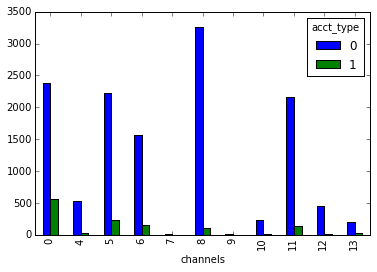

In [27]:
ax = channels_table.plot(kind='bar')

Trying to get the y-axis into a % form

In [28]:
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [225]:
stats.chi2_contingency(observed=channels_table)

(583.21920241920282,
 6.9268047171528313e-119,
 10L,
 array([[  2.67576229e+03,   5.05856455e+02,   2.23723206e+03,
           1.57943670e+03,   9.09813769e+00,   3.06061352e+03,
           1.81962754e+01,   2.15625863e+02,   2.10348943e+03,
           4.27612471e+02,   2.11076794e+02],
        [  2.65237707e+02,   5.01435447e+01,   2.21767943e+02,
           1.56563298e+02,   9.01862314e-01,   3.03386483e+02,
           1.80372463e+00,   2.13741368e+01,   2.08510567e+02,
           4.23875288e+01,   2.09232057e+01]]))

### Country

In [23]:
df.country.describe()

count     14256
unique       72
top          US
freq       9234
Name: country, dtype: object

In [69]:
df.country.unique()

array([u'US', u'IE', u'FR', u'CA', u'GB', u'', u'AU', u'ES', u'NL', u'DE',
       u'VN', u'MY', u'NZ', u'PK', u'MA', u'AR', u'MX', u'CH', None, u'SG',
       u'TH', u'BE', u'PH', u'A1', u'CI', u'AT', u'ID', u'PS', u'PT',
       u'TR', u'NI', u'KE', u'IT', u'HU', u'RS', u'RO', u'NG', u'CZ',
       u'PR', u'AE', u'BS', u'KH', u'JM', u'IN', u'NA', u'FI', u'HR',
       u'BG', u'VI', u'TJ', u'GH', u'PE', u'QA', u'SI', u'GR', u'BB',
       u'CM', u'IS', u'SE', u'RU', u'DZ', u'VE', u'UY', u'ZA', u'IM',
       u'LB', u'CR', u'IL', u'CN', u'DK', u'CO', u'EC', u'JE'], dtype=object)

Where country is 'none'

In [75]:
df.query('country != country').head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
619,0,1336086000,1774,8,None,USD,1.0,"<p>If you are a volunteer leader, you should b...",del-mi.org,1330097030,...,"[{u'event_id': 3015785, u'cost': 8.46, u'avail...",1995,1157757248,3,7125 Fall Creek Road North,US,39.868884,-86.042996,Golden-Burke Scout Center,IN
1044,0,1316845800,4358,13,None,USD,0.0,"<p><font face=""arial,helvetica,sans-serif""><sp...",estesparkfilm.com,1310405890,...,"[{u'event_id': 1902529, u'cost': 25.0, u'avail...",1461,1184186381,3,130 Moraine Ave,US,40.375475,-105.523360,Historic Park Theatre,CO
1046,0,1318734000,2341,8,None,GBP,0.0,"<p style=""text-align: center;""> <font face=""ge...",californiahouse.org.uk,1315494662,...,"[{u'event_id': 1902639, u'cost': 10.0, u'avail...",1588,1178274926,3,3 Bedford Square,GB,51.519054,-0.128780,Winston House,Greater London
1135,0,1335119400,2261,8,None,USD,1.0,<p>Support Team Training is <strong>for incomi...,bnisd.com,1332259059,...,"[{u'event_id': 3180519, u'cost': 17.91, u'avai...",1712,1184350454,3,705 Palomar Airport Road,US,33.121019,-117.323285,Carlsbad - Nat'l University,
1598,0,1327894200,121,8,None,USD,0.0,"<p>For details, info and updates, please visit...",incrementor.com,1325174988,...,"[{u'event_id': 2690145, u'cost': 4.68, u'avail...",1567,1189784216,3,163 William Street,US,40.710094,-74.005880,Pace University William Street,NY


In [87]:
df['country'] = df.country.map(lambda x: 'unknown' if x == '' else str(x))

In [82]:
df.country.fillna(value='unknown',inplace=True)

In [88]:
df.country.unique()

array(['US', 'IE', 'FR', 'CA', 'GB', 'unknown', 'AU', 'ES', 'NL', 'DE',
       'VN', 'MY', 'NZ', 'PK', 'MA', 'AR', 'MX', 'CH', 'SG', 'TH', 'BE',
       'PH', 'A1', 'CI', 'AT', 'ID', 'PS', 'PT', 'TR', 'NI', 'KE', 'IT',
       'HU', 'RS', 'RO', 'NG', 'CZ', 'PR', 'AE', 'BS', 'KH', 'JM', 'IN',
       'NA', 'FI', 'HR', 'BG', 'VI', 'TJ', 'GH', 'PE', 'QA', 'SI', 'GR',
       'BB', 'CM', 'IS', 'SE', 'RU', 'DZ', 'VE', 'UY', 'ZA', 'IM', 'LB',
       'CR', 'IL', 'CN', 'DK', 'CO', 'EC', 'JE'], dtype=object)

In [89]:
len(df.country.map(clean_country))==num_rows

True

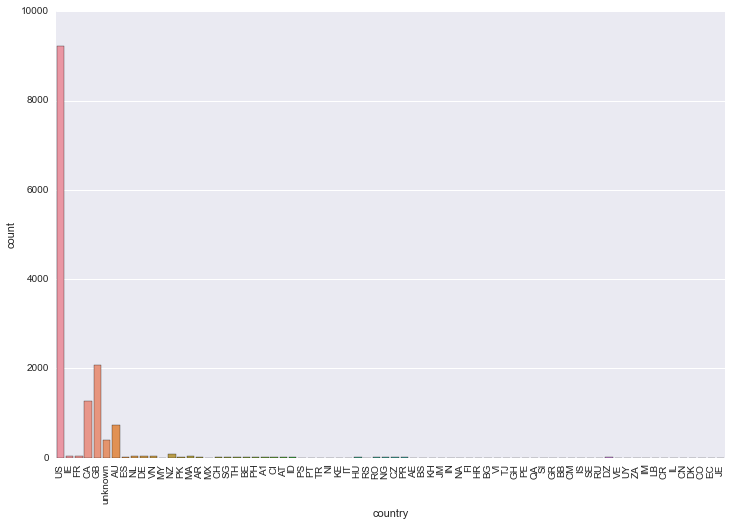

In [137]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x='country',data=df)

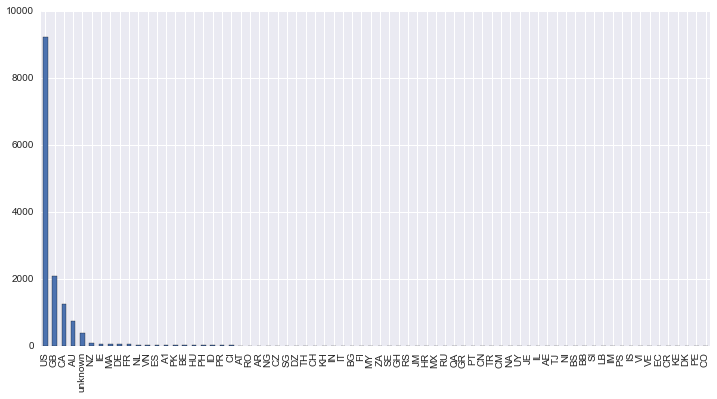

In [281]:
df.country.value_counts().plot(kind='bar',figsize=(12,6))

Try putting this on a log scale

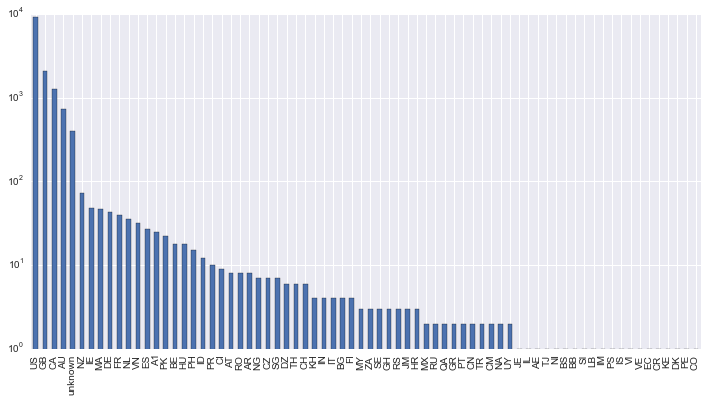

In [280]:
df.country.value_counts().plot(kind='bar',figsize=(12,6),logy=True)

In [139]:
pd.set_option('display.max_columns',70)

In [140]:
pd.crosstab(df.acct_type,df.country)

country,A1,AE,AR,AT,AU,BB,BE,BG,BS,CA,CH,CI,CM,CN,CO,CR,CZ,DE,DK,DZ,EC,ES,FI,FR,GB,GH,GR,HR,HU,ID,IE,IL,IM,IN,IS,...,JM,KE,KH,LB,MA,MX,MY,NA,NG,NI,NL,NZ,PE,PH,PK,PR,PS,PT,QA,RO,RS,RU,SE,SG,SI,TH,TJ,TR,US,UY,VE,VI,VN,ZA,unknown
acct_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,4,8,727,1,17,1,1,1209,0,0,0,0,0,1,0,28,0,0,1,26,2,37,1789,0,2,2,18,2,48,0,1,3,1,...,1,1,0,1,0,2,0,0,1,1,30,59,1,0,1,6,0,1,1,5,2,0,3,7,0,6,1,0,8615,2,1,1,1,3,357
1,25,0,4,0,15,0,1,3,0,53,6,9,2,2,1,0,7,15,1,6,0,1,2,3,294,3,0,1,0,10,0,1,0,1,0,...,2,0,4,0,47,0,3,2,6,0,6,14,0,15,21,4,1,1,1,3,1,2,0,0,1,0,0,2,619,0,0,0,31,0,40


In [141]:
country_lst = ['US','GB','CA','AU']

"other" is 7% of the data but represents ~25% of all fraud

In [144]:
pd.crosstab(df.acct_type,df.country.map(lambda x: 'other' if x not in country_lst else x),margins=True)

country,AU,CA,GB,US,other,All
acct_type,,,,,,
0,727,1209,1789,8615,704,13044
1,15,53,294,619,312,1293
All,742,1262,2083,9234,1016,14337


In [150]:
1016/14337.

0.070865592522843

In [151]:
(742+1262+2083+9234)/14337.

0.929134407477157

In [152]:
(15+53+294+619)/1293.

0.7587006960556845

### Currency

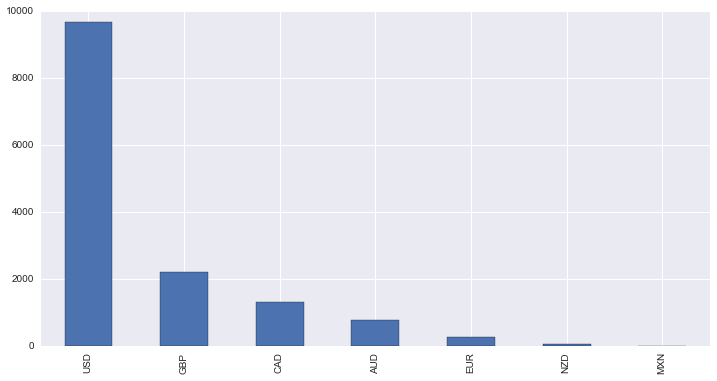

In [164]:
df.currency.value_counts().plot(kind='bar',figsize=(12,6))

In [167]:
pd.set_option('display.max_rows',170)

The majority of fraud is with the USD

In [233]:
pd.crosstab(df.acct_type,df.currency,margins=True)

currency,AUD,CAD,EUR,GBP,MXN,NZD,USD,All
acct_type,,,,,,,,
0,767,1280,225,1879,0,55,8838,13044
1,12,42,37,343,1,0,858,1293
All,779,1322,262,2222,1,55,9696,14337


In [168]:
df.groupby(['acct_type','country','currency']).count()

approx_payout_date  body_length  channels  \
acct_type country currency                                              
0         AE      USD                        1            1         1   
          AR      USD                        4            4         4   
          AT      AUD                        2            2         2   
                  EUR                        3            3         3   
                  USD                        3            3         3   
          AU      AUD                      718          718       718   
                  EUR                        1            1         1   
                  GBP                        1            1         1   
                  NZD                        3            3         3   
                  USD                        4            4         4   
          BB      USD                        1            1         1   
          BE      EUR                       17           17        17   
          BG      USD                        1            1         1   
          BS      USD                        1            1         1   
          CA      CAD                     1177         1177      1177   
                  EUR                        5            5         5   
                  USD                       27           27        27   
          CR      USD                        1            1         1   
          DE      EUR                       23           23        23   
                  GBP                        4            4         4   
                  USD                        1            1         1   
          EC      USD                        1            1         1   
          ES      CAD                        2            2         2   
                  EUR                       23           23        23   
                  GBP                        1            1         1   
          FI      EUR                        1            1         1   
                  USD                        1            1         1   
          FR      AUD                        1            1         1   
                  EUR                       34           34        34   
                  GBP                        1            1         1   
                  USD                        1            1         1   
          GB      AUD                        3            3         3   
                  CAD                        2            2         2   
                  EUR                        9            9         9   
                  GBP                     1769         1769      1769   
                  USD                        6            6         6   
          GR      GBP                        2            2         2   
          HR      GBP                        2            2         2   
          HU      EUR                        6            6         6   
                  GBP                       12           12        12   
          ID      GBP                        2            2         2   
          IE      EUR                       47           47        47   
                  GBP                        1            1         1   
          IM      GBP                        1            1         1   
          IN      AUD                        1            1         1   
                  USD                        2            2         2   
          IS      USD                        1            1         1   
          IT      CAD                        1            1         1   
                  EUR                        1            1         1   
                  GBP                        1            1         1   
                  USD                        1            1         1   
          JM      USD                        1            1         1   
          KE      GBP                        1            1         1   
          LB 

Exporting to MMA

In [215]:
np.savetxt('country_currency.csv',df[['country','currency']].values.astype('str'),fmt=['%s','%s'],delimiter=',')

In [204]:
df.country.unique()

array(['US', 'IE', 'FR', 'CA', 'GB', 'unknown', 'AU', 'ES', 'NL', 'DE',
       'VN', 'MY', 'NZ', 'PK', 'MA', 'AR', 'MX', 'CH', 'SG', 'TH', 'BE',
       'PH', 'A1', 'CI', 'AT', 'ID', 'PS', 'PT', 'TR', 'NI', 'KE', 'IT',
       'HU', 'RS', 'RO', 'NG', 'CZ', 'PR', 'AE', 'BS', 'KH', 'JM', 'IN',
       'NA', 'FI', 'HR', 'BG', 'VI', 'TJ', 'GH', 'PE', 'QA', 'SI', 'GR',
       'BB', 'CM', 'IS', 'SE', 'RU', 'DZ', 'VE', 'UY', 'ZA', 'IM', 'LB',
       'CR', 'IL', 'CN', 'DK', 'CO', 'EC', 'JE'], dtype=object)

In [237]:
mismatch_index = np.loadtxt('data/indices.csv',delimiter=',').astype('int')

~35% of the cases where there is a mismatch between the country and currency (i.e. the country's currency doesn't match the currency) are fraud

In [229]:
df.iloc[mismatch_index].groupby('acct_type').count().approx_payout_date

acct_type
0    642
1    344
Name: approx_payout_date, dtype: int64

In [228]:
344/(344+642.)

0.3488843813387424

The mismatched and fraud case represent ~26% of all fraud cases

In [234]:
344/1293.

0.2660479505027069

### delivery_method

In [252]:
df.delivery_method.value_counts()

0.0    8520
1.0    5554
3.0     247
Name: delivery_method, dtype: int64

In [250]:
df.delivery_method.unique()

array([  0.,   1.,   3.,  nan])

In [257]:
df.query('delivery_method != delivery_method').size

704

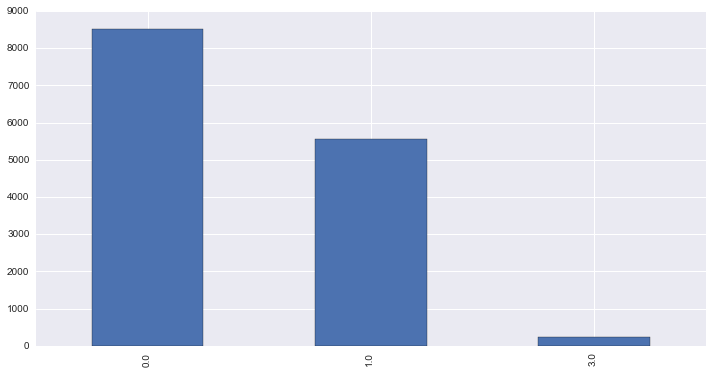

In [259]:
df.delivery_method.value_counts().plot(kind='bar',figsize=(12,6))

In [270]:
df.query('delivery_method != delivery_method').shape[0]

16

In [264]:
pd.crosstab(df.acct_type,df.delivery_method,margins=True)

delivery_method,0.0,1.0,3.0,All
acct_type,,,,
0,7319,5481,240,13040
1,1201,73,7,1281
All,8520,5554,247,14321


In [275]:
240/13040.

0.018404907975460124

In [276]:
7/1281.

0.00546448087431694

In [278]:
7319/13040.

0.5612730061349693

In [277]:
1201/1281.

0.9375487900078064

In [279]:
5481/13040.

0.42032208588957054

In [325]:
73/1281.

0.05698672911787666

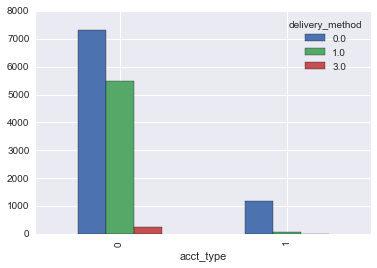

In [283]:
pd.crosstab(df.acct_type,df.delivery_method).plot(kind='bar')

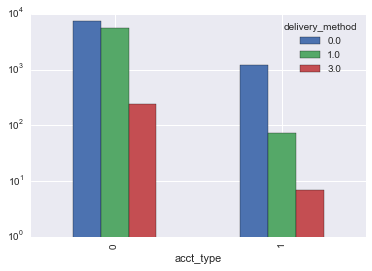

In [282]:
pd.crosstab(df.acct_type,df.delivery_method).plot(kind='bar',logy=True)

In [272]:
stats.chi2_contingency(observed=pd.crosstab(df.acct_type,df.delivery_method))

(685.95379703418234,
 1.1143601002220532e-149,
 2L,
 array([[ 7757.89400182,  5057.19991621,   224.90608198],
        [  762.10599818,   496.80008379,    22.09391802]]))

### Email_Domain

In [289]:
df.email_domain.describe()

count         14337
unique         5772
top       gmail.com
freq           3097
Name: email_domain, dtype: object

Yahoo makes up a relatively larger proportion of fraud cases than non fraud cases

In [327]:
df.query('acct_type == 1').email_domain.value_counts().head(15)/fraud_num

gmail.com             0.266821
yahoo.com             0.219644
hotmail.com           0.078113
ymail.com             0.034029
aol.com               0.030936
lidf.co.uk            0.027069
live.com              0.025522
live.fr               0.025522
yahoo.co.uk           0.020108
rocketmail.com        0.015468
yahoo.fr              0.013921
hotmail.co.uk         0.013148
ultimatewine.co.uk    0.010054
yahoo.ca              0.009281
yopmail.com           0.007734
Name: email_domain, dtype: float64

In [326]:
df.query('acct_type == 0').email_domain.value_counts().head(15)/legit_num

gmail.com                   0.210978
yahoo.com                   0.038945
hotmail.com                 0.022846
aol.com                     0.012113
me.com                      0.005443
comcast.net                 0.004446
generalassemb.ly            0.004446
kineticevents.com           0.003987
live.com                    0.003603
improvboston.com            0.003527
sippingnpainting.com        0.002990
claytonislandtours.com      0.002837
racetonowhere.com           0.002683
hotmail.co.uk               0.002377
greatworldadventures.com    0.002377
Name: email_domain, dtype: float64

### Event Time Variables

In [335]:
df.iloc[0:4,9:13]

,event_created,event_end,event_published,event_start
0,1262739706,1265630400,1.263110e+09,1265594400
1,1293832670,1296288000,1.293833e+09,1296255600
2,1291090956,1295740800,1.291092e+09,1295713800
3,1360681570,1388534400,1.360683e+09,1360702800


In [9]:
test_dict={x:pd.to_datetime(df[x],unit='s') for x in df.columns[9:13]}

In [10]:
df_time = pd.DataFrame(test_dict)

In [11]:
df_time['acct_type'] = df['acct_type']

In [58]:
df_time['user_created'] = pd.to_datetime(df.user_created,unit='s')

In [31]:
df_time['created_to_start'] = (df_time.event_start - df_time.event_created).dt.days

almost half of the negative one are fraud

In [274]:
df_time.query('created_to_start < 0 and acct_type ==1').shape[0]

21

In [16]:
df_time.created_to_start.value_counts().head(10)

0     429
40    308
1     293
22    245
30    231
27    225
29    223
23    222
15    218
25    217
Name: created_to_start, dtype: int64

In [17]:
df_time.groupby('acct_type').mean().created_to_start

acct_type
0    53.613385
1    16.238206
Name: created_to_start, dtype: float64

In [29]:
df_time.groupby('acct_type').median().created_to_start

acct_type
0    37
1     4
Name: created_to_start, dtype: int64

If the start time is earlier than the date created set it to zero

In [17]:
df_time['created_to_start'] = df_time.created_to_start.map(lambda x: 0 if x < 0 else x)

In [ ]:
plt.hist([df['gts'][fltr],df['gts'][~fltr]],stacked=True,bins=20,normed=True)
plt.show()

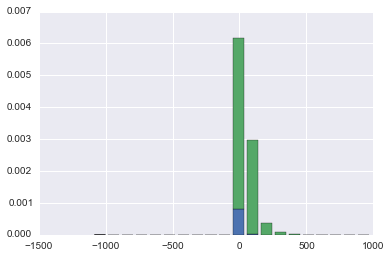

In [271]:
plt.hist([df_time['created_to_start'][fltr],df_time['created_to_start'][~fltr]],bins=20,stacked=True,normed=True)
plt.show()

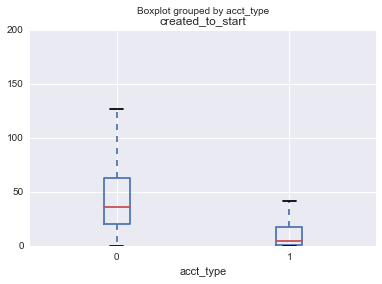

In [20]:
df_time.query('created_to_start <= 200 ').boxplot(by='acct_type',column='created_to_start')

#### Event Length

Look at the event length in terms of hours and days

In [36]:
df_time['event_length_Days'] =(df_time.event_end-df_time.event_start).dt.days

In [37]:
df_time['event_length_Hrs'] =(df_time.event_end-df_time.event_start).dt.components.hours 
#could do: (df_time.event_end-df_time.event_start)/pd.Timedelta('1 hours') not sure why I couldn't just access hours directly

In [38]:
df_time.event_length_Hrs.value_counts().head(20)

3     3366
2     2941
1     1622
4     1461
5      948
6      820
7      775
8      758
9      346
0      343
10     149
11     100
12      92
22      85
23      76
15      72
21      71
14      60
20      49
16      44
Name: event_length_Hrs, dtype: int64

In [39]:
df_time.query('event_length_Hrs < 0').shape[0]

0

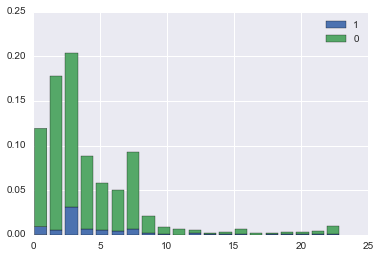

In [280]:
plt.hist([df_time['event_length_Hrs'][fltr],df_time['event_length_Hrs'][~fltr]],bins=20,stacked=True,normed=True,label=['1','0'])
plt.legend()
plt.show()

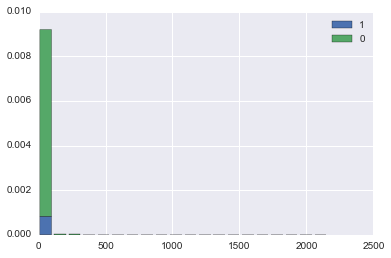

In [283]:
plt.hist([df_time['event_length_Days'][fltr],df_time['event_length_Days'][~fltr]],bins=20,stacked=True,normed=True,label=['1','0'])
plt.legend()
plt.show()

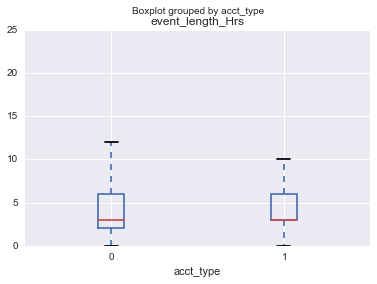

In [44]:
df_time.boxplot(by='acct_type',column='event_length_Hrs')

#### User Created to Event Start

In [70]:
df_time['userCreated_to_eventStart'] = (df_time['event_start']-df_time['user_created']).dt.days

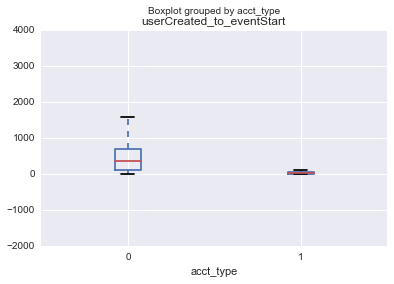

In [73]:
df_time.boxplot(by='acct_type',column='userCreated_to_eventStart')

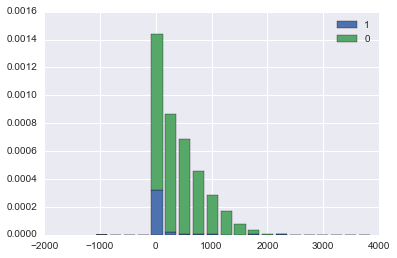

In [284]:
plt.hist([df_time['userCreated_to_eventStart'][fltr],df_time['userCreated_to_eventStart'][~fltr]],bins=20,stacked=True,normed=True,label=['1','0'])
plt.legend()
plt.show()

### Exporting for MMA

In [52]:
np.savetxt("C:/Users/Anon/Desktop/test.csv", \
           df_time[['acct_type','created_to_start']].astype('int'),fmt=['%d','%d'],delimiter=',')

### Fb_published

In [80]:
df.fb_published.unique()

array([0, 1], dtype=int64)

In [85]:
pd.crosstab(df.fb_published,df_time.acct_type)

acct_type,0,1
fb_published,,
0,11246,1264
1,1798,29


Probability of being fraud given fb_published

In [86]:
29/(29+1798.)

0.015873015873015872

### GTS

In [109]:
print df.gts.max()
print df.gts.min()

306293.93
0.0


In [104]:
df.groupby('acct_type').mean().gts

acct_type
0    2481.679602
1    1911.214362
Name: gts, dtype: float64

In [256]:
fltr = df['acct_type'] ==1

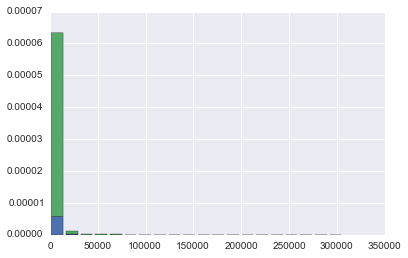

In [264]:
plt.hist([df['gts'][fltr],df['gts'][~fltr]],stacked=True,bins=20,normed=True)
plt.show()

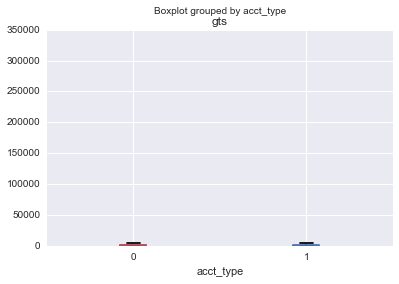

In [285]:
df.boxplot(column='gts',by='acct_type')

### "Has" variables

In [122]:
pd.crosstab(df.acct_type,df.has_analytics,margins=True)

has_analytics,0,1,All
acct_type,,,
0,12001,1043,13044
1,1289,4,1293
All,13290,1047,14337


In [123]:
1043/13044.

0.07996013492793622

In [124]:
4/1293.

0.0030935808197989174

In [125]:
4/1047.

0.0038204393505253103

In [157]:
stats.chi2_contingency(observed=pd.crosstab(df.acct_type,df.has_analytics))

(101.54408240486973,
 6.9890641818527116e-24,
 1L,
 array([[ 12091.42498431,    952.57501569],
        [  1198.57501569,     94.42498431]]))

In [130]:
df['has_header'] = df.has_header.fillna(-1)

In [134]:
df['has_header'].groupby(df['acct_type']).value_counts() #not this didn't work df['has_header'].groupby('acct_type').count()

acct_type  has_header
0           0.0          6641
           -1.0          4635
            1.0          1768
1          -1.0           774
            0.0           483
            1.0            36
Name: has_header, dtype: int64

In [136]:
pd.crosstab(df.acct_type,df.has_header,margins=True)

has_header,-1.0,0.0,1.0,All
acct_type,,,,
0,4635,6641,1768,13044
1,774,483,36,1293
All,5409,7124,1804,14337


In [139]:
pd.crosstab(df.acct_type,df.has_logo,margins=True)

has_logo,0,1,All
acct_type,,,
0,1806,11238,13044
1,458,835,1293
All,2264,12073,14337


In [140]:
11238/legit_num

0.8615455381784729

In [142]:
835/fraud_num

0.645784996133024

In [155]:
stats.chi2_contingency(observed=pd.crosstab(df.acct_type,df.has_logo))

(410.2109927120448,
 3.2976063053255142e-91,
 1L,
 array([[  2059.81837204,  10984.18162796],
        [   204.18162796,   1088.81837204]]))

### Listed

In [148]:
pd.crosstab(df.acct_type,df.listed,margins=True)

listed,n,y,All
acct_type,,,
0,1829,11215,13044
1,217,1076,1293
All,2046,12291,14337


In [149]:
217/(2046.)

0.10606060606060606

In [151]:
1076/12291.

0.08754373118542022

In [152]:
1-1076/12291.

0.9124562688145798

In [153]:
stats.chi2_contingency(observed=pd.crosstab(df.acct_type,df.listed))

(7.1056146184054878,
 0.0076842872236877972,
 1L,
 array([[  1861.4789705,  11182.5210295],
        [   184.5210295,   1108.4789705]]))

### Name Length

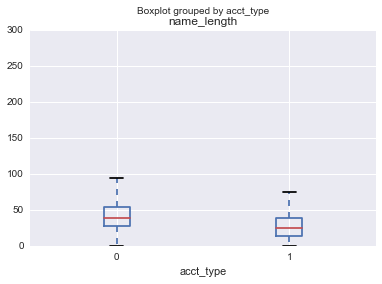

In [154]:
df.boxplot(column='name_length',by='acct_type')

## EDA on remaining columns 

In [292]:
df.iloc[1:4,22:30]

,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type
1,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK
2,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK
3,16,885645,,0.0,,0.0,,ACH


In [293]:
df.iloc[1:4,30:]

,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,zero_body_length
1,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,"[{u'name': u'Danielle Severn', u'created': u'2...",54.0,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,"[{u'name': u'', u'created': u'2010-11-09 01:10...",0.0,0,0,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None,0


### Num Payouts

In [211]:
df.num_payouts.max()

1858

Remember you can unstack columns

This is interesting - these rows are basically the same

In [190]:
df.query('num_payouts > 20 and acct_type == 1').head(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,zero_body_length
140,1,1333519200,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1332979005,...,328,1304639602,3,,None,NaN,NaN,None,None,0
2674,1,1336543200,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1336063263,...,364,1304639602,3,,None,NaN,NaN,None,None,0
2675,1,1336629600,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1336142430,...,365,1304639602,3,,None,NaN,NaN,None,None,0
6172,1,1336284000,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1335800046,...,361,1304639602,3,,None,NaN,NaN,None,None,0
6637,1,1333605600,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1333120440,...,330,1304639602,3,,None,NaN,NaN,None,None,0


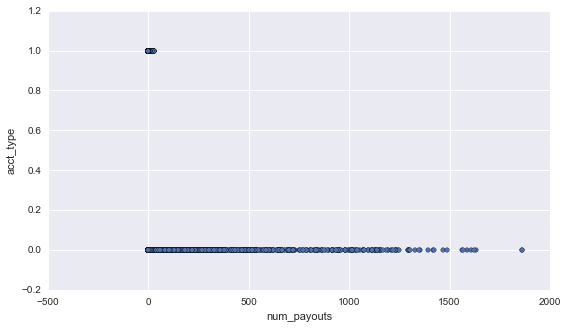

In [315]:
df.plot(kind='scatter',x='num_payouts',y='acct_type',figsize=(9,5))

In [187]:
df.query('acct_type == 1').num_payouts.value_counts()#.hist(bins=20)

0     1154
1       55
2       18
3       18
7       11
5        5
6        4
29       4
4        3
11       3
9        3
23       2
19       1
21       1
27       1
26       1
22       1
8        1
20       1
18       1
12       1
28       1
16       1
17       1
14       1
Name: num_payouts, dtype: int64

### Org 

In [299]:
df.query("acct_type==1 and org_desc == '' ").shape[0]

850

In [301]:
observed = pd.crosstab(df.acct_type,df.org_desc.apply(lambda x: 0 if x=='' else 1))

In [304]:
pd.crosstab(df.acct_type,df.org_desc.apply(lambda x: 0 if x=='' else 1),margins=1)

org_desc,0,1,All
acct_type,,,
0,5315,7729,13044
1,850,443,1293
All,6165,8172,14337


In [307]:
850/6165.

0.137875101378751

In [308]:
5315/6165.

0.862124898621249

In [303]:
stats.chi2_contingency(observed=observed)

(298.76236335142056,
 6.1293234332883996e-67,
 1L,
 array([[ 5609.00188324,  7434.99811676],
        [  555.99811676,   737.00188324]]))

In [316]:
df.query('acct_type ==1 ').org_name

0                    Party Starz Ent & Diverse Int'l Group
26                                                        
51                                          CP Enterprises
54                                   The London Connection
70                                    Shyone Tha MainEvent
128                 THE SAM'S CAMPING AND CARAVANNING CLUB
130                                        Global Gas Card
131                 ORLANDO PHYSICIANS AGAINST BONE MARROW
140                                        Global Gas Card
144               American Society of Landscape Architects
149                                                       
161                                               Shamekac
177                                                       
181                                Mike Weaver Productions
183                       The MillerBrady Fine Art Gallery
187      Pride LGBTQ Ministries ~ Diversity is our stre...
202                                     Blue October Lov

In [319]:
pd.crosstab(df.acct_type, df.org_name.apply(lambda x: 0 if x == '' else 1),margins=1)

org_name,0,1,All
acct_type,,,
0,1016,12028,13044
1,446,847,1293
All,1462,12875,14337


In [323]:
446/1462.

0.30506155950752395

In [322]:
847/12875.

0.0657864077669903

In [321]:
stats.chi2_contingency(observed=pd.crosstab(df.acct_type, df.org_name.apply(lambda x: 0 if x == '' else 1)))

(913.17755165774372,
 1.3403009198076737e-200,
 1L,
 array([[  1330.14772965,  11713.85227035],
        [   131.85227035,   1161.14772965]]))

### Payee Name

In [309]:
pd.crosstab(df.acct_type,df.payee_name.apply(lambda x: 0 if x=='' else 1),margins=1)

payee_name,0,1,All
acct_type,,,
0,9897,3147,13044
1,1263,30,1293
All,11160,3177,14337


give that there is a name it's unlikely that it's fraud

In [310]:
30/3177.

0.009442870632672332

### Payout type

In [312]:
df.payout_type.unique()

array([u'', u'CHECK', u'ACH'], dtype=object)

In [314]:
pd.crosstab(df.acct_type,df.payout_type.apply(lambda x: "unknown" if x =='' else x),margins=1)

payout_type,ACH,CHECK,unknown,All
acct_type,,,,
0,9854,3148,42,13044
1,812,30,451,1293
All,10666,3178,493,14337


### Ticket types

In [330]:
fraud_tickets = df.query('acct_type ==1').head(10).ticket_types.values

In [331]:
fraud_tickets[0]

[{u'availability': 1,
  u'cost': 25.0,
  u'event_id': 527017,
  u'quantity_sold': 0,
  u'quantity_total': 800},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 527017,
  u'quantity_sold': 0,
  u'quantity_total': 100},
 {u'availability': 1,
  u'cost': 550.0,
  u'event_id': 527017,
  u'quantity_sold': 0,
  u'quantity_total': 20}]

In [334]:
legit_tickets = df.query('acct_type == 0').head(10).ticket_types.values

In [335]:
legit_tickets[0]

[{u'availability': 1,
  u'cost': 35.0,
  u'event_id': 786878,
  u'quantity_sold': 22,
  u'quantity_total': 50},
 {u'availability': 1,
  u'cost': 35.0,
  u'event_id': 786878,
  u'quantity_sold': 3,
  u'quantity_total': 50}]

In [417]:
def avg_tickets(row):
    if row['ticket_types'] == []:
        return 0
    else: return np.nanmean(np.array([x['quantity_sold'] for x in row['ticket_types']]))

In [418]:
df['avg_tickets'] = df.apply(avg_tickets,axis=1)

In [419]:
df.avg_tickets.max()

3336.6666666666665

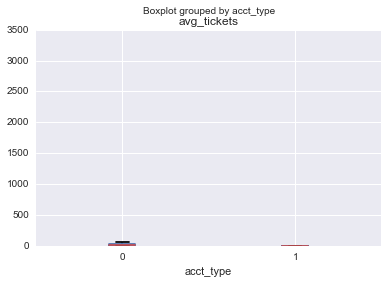

In [404]:
df.boxplot(column='avg_tickets',by='acct_type')

Exception KeyboardInterrupt in <function remove at 0x00000000DD75A278> ignored


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000E4146E10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000E4826208>], dtype=object)

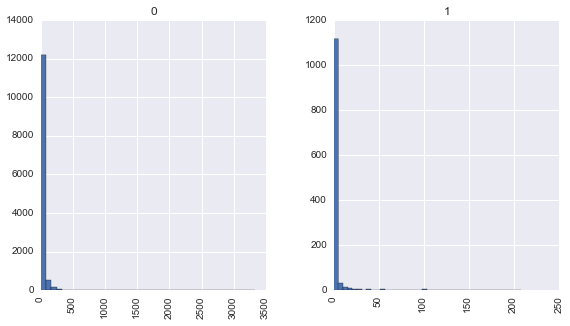

In [390]:
df.hist(by='acct_type',column='avg_tickets',bins=40,figsize=(9,5))

In [421]:
df['avg_tickets'].groupby(df['acct_type']).mean()

acct_type
0    27.609086
1     2.784840
Name: avg_tickets, dtype: float64

In [406]:
np.savetxt("C:/Users/Anon/Desktop/test.csv", \
           df[['acct_type','avg_tickets']],fmt=['%d','%f'],delimiter=',')

### Venue

In [ ]:
df['diff_country'] = (df['venue_country'] != df['country']).apply(lambda x: 0 if x == False else 1)

In [426]:
pd.crosstab(df.acct_type,df.venue_name.isnull(),margins=1)

venue_name,False,True,All
acct_type,,,
0,12338,706,13044
1,923,370,1293
All,13261,1076,14337


In [427]:
706/1076.

0.6561338289962825

In [434]:
pd.crosstab(df.acct_type,(df.venue_country != df.country),margins=1)

col_0,False,True,All
acct_type,,,
0,10988,2056,13044
1,684,609,1293
All,11672,2665,14337


In [435]:
609/2665.

0.22851782363977485

In [436]:
684/11672.

0.05860178204249486

# Misc

Mark fraudulent events as red

colors = np.where(df.acct_type == 1,'r','k')

df.plot(kind='scatter',x='row_num',y='body_length',c=colors,figsize=(12,8),s=10,edgecolors='none',alpha=.7)

Not sure if it makes sense to construct this variable, the model will probably make the optimal split 

df['body_GT1000'] = df['body_length'].map(lambda x: 0 if x <=1000 else 1)

In [209]:
(df.query('body_length >= 1000 and acct_type == 0').shape[0]/13044.) 

(df.query('body_length > 1000 and acct_type == 1').shape[0]/1293.)

approximatly 73% of non-fraud events have a body length greater than 1000, 33% of fraud event 

0.7262342839619749

In [16]:
df.groupby(['acct_type']).mean().body_length

acct_type
0    3886.994557
1    1508.886311
Name: body_length, dtype: float64

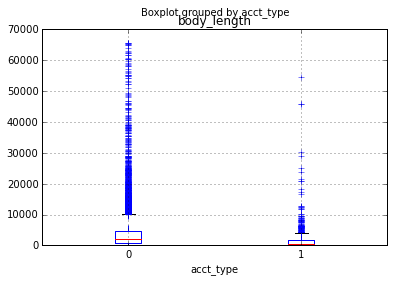

In [22]:
df.boxplot(column='body_length',by='acct_type')

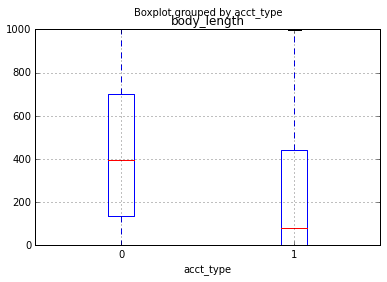

In [7]:
df.query('body_length <= 1000').boxplot(column='body_length',by='acct_type')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002E3A5CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002E0A6710>], dtype=object)

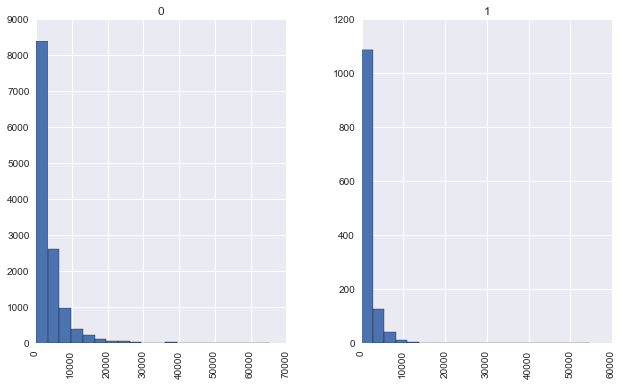

In [91]:
df.hist(column='body_length',by='acct_type',bins=20,figsize=(10,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020517C18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000205897B8>], dtype=object)

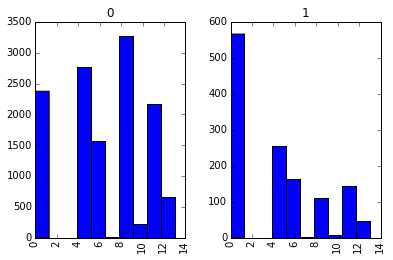

In [25]:
df.hist(by='acct_type',column='channels')

In [205]:
pd.pivot_table(df,index=['acct_type'],columns=['body_GT1000'],values='body_length')

body_GT1000,0,1
acct_type,,
0,422.027723,5193.169640
1,240.333333,3985.171233


In [43]:
df['approx_payout_date'] = pd.to_datetime(df['approx_payout_date'],unit='s') #you can use .dt.date to just get the dateV

In [21]:
np.savetxt('crosstab.csv',channels_table.values.T,delimiter=',')

In [406]:
df[df.country.isnull()]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state


In [68]:
def clean_country(val):
    if val == '' or val != val:
        return 'unknown'
    else:
        return val

If you wanted fractional amount of days:

In [409]:
df_time.created_to_start/np.timedelta64(1,'D') 

0         33.040440
1         28.043171
2         53.505139
3          0.245718
4         63.024699
5         65.182755
6         35.228958
7         21.342164
8         38.297199
9         28.336968
10        18.881146
11        27.008657
12        75.536157
13        62.243866
14        51.276863
15        61.113981
16        33.154178
17        19.446875
18       184.518009
19        51.245984
20        46.626748
21        27.058634
22        18.822396
23        34.884653
24        30.258067
25        46.072303
26         0.022963
27        35.407176
28        99.980637
29        16.205579
30        35.168843
31       149.723380
32        20.272951
33        70.228403
34        25.776505
35        24.101678
36        38.495486
37        60.423333
38         9.349398
39       127.529062
40        67.766123
41        11.842951
42        18.073588
43         0.083993
44        36.345116
45        60.986806
46        96.665289
47        23.916852
48        48.862650
49        66.591215


This is basically the same thing as the cross-tab

In [36]:
df_time.groupby(['created_to_start','acct_type'])['created_to_start'].count().unstack('acct_type').fillna(0)

acct_type,0,1
created_to_start,,
0,251.0,245.0
1,105.0,188.0
2,109.0,103.0
3,96.0,87.0
4,96.0,88.0
5,106.0,61.0
6,112.0,45.0
7,154.0,23.0
8,137.0,22.0


In [415]:
neg_times = df_time[df_time.created_to_start < 0].index.tolist()

In [206]:
df.query("acct_type ==1 and description != '' ").groupby('description').count().query('venue_longitude > 1')

acct_type  \
description                                                     
<div style="text-align: center;"><strong></stro...          2   
<h1 class="post">Welcome</h1>\r\n<p> </p>\r\n<d...          2   
<h1 class="post">Welcome</h1>\r\n<p> </p>\r\n<d...         21   
<h3><span style="font-size: small;">When, Where...          2   
<h5 style="margin: 0px 0px 5px; padding: 0px; f...          2   
<p class="MsoNormal" style="text-align: justify...          2   
<p style="color: #000000; text-align: center;">...          3   
<p style="margin: 0px; padding: 0px; clear: bot...          2   
<p style="text-align: center;"><br />SPECIAL VI...          2   
<p>&nbsp;</p>\r\n<p>&nbsp;</p>\r\n<p>&nbsp;</p>...          2   
<p>&nbsp;</p>\r\n<p><span style="font-size: med...          2   
<p>4 Rounds of Game/30 minutes<br />EF: $85 ($8...          6   
<p><span class="vevent"><span class="descriptio...          4   
<p><span class="vevent"><span class="descriptio...          2   
<p><span style="color: #f4f4f4; font-size: medi...          2   
<p><span style="font-size: small; color: #00808...          2   
<p><strong>Presented by</strong></p>\r\n<p><br ...          2   
<p>Bar club</p>                                             3   
<p>Hello. I the chess player and I have decided...          2   
<p>Ready to get fit? Well here is your chance, ...          2   
<p>Showcasing new ideas in email &amp; digital ...          3   
<p>The AEIRS will be holding a Clinical Instruc...          2   
<ul>\r\n<li><font face="georgia,palatino" size=...         10   
<ul>\r\n<li><font face="georgia,palatino" size=...          3   
Booked items\r\n\r\n\r\nYour trip: Midway  to L...          2   

                                                    approx_payout_date  \
description                                                              
<div style="text-align: center;"><strong></stro...                   2   
<h1 class="post">Welcome</h1>\r\n<p> </p>\r\n<d...                   2   
<h1 class="post">Welcome</h1>\r\n<p> </p>\r\n<d...                  21   
<h3><span style="font-size: small;">When, Where...                   2   
<h5 style="margin: 0px 0px 5px; padding: 0px; f...                   2   
<p class="MsoNormal" style="text-align: justify...                   2   
<p style="color: #000000; text-align: center;">...                   3   
<p style="margin: 0px; padding: 0px; clear: bot...                   2   
<p style="text-align: center;"><br />SPECIAL VI...                   2   
<p>&nbsp;</p>\r\n<p>&nbsp;</p>\r\n<p>&nbsp;</p>...                   2   
<p>&nbsp;</p>\r\n<p><span style="font-size: med...                   2   
<p>4 Rounds of Game/30 minutes<br />EF: $85 ($8...                   6   
<p><span class="vevent"><span class="descriptio...                   4   
<p><span class="vevent"><span class="descriptio...                   2   
<p><span style="color: #f4f4f4; font-size: medi...                   2   
<p><span style="font-size: small; color: #00808...                   2   
<p><strong>Presented by</strong></p>\r\n<p><br ...                   2   
<p>Bar club</p>                                                      3   
<p>Hello. I the chess player and I have decided...                   2   
<p>Ready to get fit? Well here is your chance, ...                   2   
<p>Showcasing new ideas in email &amp; digital ...                   3   
<p>The AEIRS will be holding a Clinical Instruc...                   2   
<ul>\r\n<li><font face="georgia,palatino" size=...                  10   
<ul>\r\n<li><font face="georgia,palatino" size=...                   3   
Booked items\r\n\r\n\r\nYour trip: Midway  to L...                   2   

                                                    body_length  channels  \
description                                                                 
<div style="text-align: center;"><strong></stro...            2         2   
<h1 class="post">Welcome</h1>\r\n<p> </p>\r\n<d...            2   